## Music Exploratory Data Analysis

In [2]:
from music21 import stream, interval, corpus, converter, instrument, metadata
from music21 import note, chord, environment, duration, clef, pitch, key
from music21.stream import Score, Part, Measure
import notebook
from datetime import date, timedelta
import random, math, re
import pandas as pd
import pathlib, random, copy
from builtins import isinstance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [1]:
import sys
#sys.path.append('C:\\Compile\\dwbzen\\dwbzen')
from dwbzen.music import MusicUtils, Instruments

In [5]:
import dwbzen
dir(dwbzen)

['Environment',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'common',
 'environmentGlobal',
 'music']

### Intervals

In [3]:
meta = MusicUtils.get_metadata_bundle(composer='Bach', title='^bwv[1,4].*')
titles = [meta[i].metadata.title for i in range(len(meta))]
print(f'number of titles: {len(titles)}\n{titles} ')

number of titles: 112
['bwv10.7.mxl', 'bwv101.7.mxl', 'bwv102.7.mxl', 'bwv103.6.mxl', 'bwv104.6.mxl', 'bwv108.6.mxl', 'bwv11.6.mxl', 'bwv110.7.mxl', 'bwv112.5-sc.mxl', 'bwv113.8.mxl', 'bwv114.7.mxl', 'bwv115.6.mxl', 'bwv117.4.mxl', 'bwv121.6.mxl', 'bwv122.6.mxl', 'bwv123.6.mxl', 'bwv126.6.mxl', 'bwv127.5.mxl', 'bwv13.6.mxl', 'bwv133.6.mxl', 'bwv136.6.mxl', 'bwv14.5.mxl', 'bwv140.7.mxl', 'bwv144.3.mxl', 'bwv144.6.mxl', 'bwv145.5.mxl', 'bwv148.6.mxl', 'bwv151.5.mxl', 'bwv153.1.mxl', 'bwv153.5.mxl', 'bwv153.9.mxl', 'bwv154.3.mxl', 'bwv154.8.mxl', 'bwv155.5.mxl', 'bwv156.6.mxl', 'bwv159.5.mxl', 'bwv16.6.mxl', 'bwv161.6.mxl', 'bwv164.6.mxl', 'bwv166.6.mxl', 'bwv168.6.mxl', 'bwv169.7.mxl', 'bwv17.7.mxl', 'bwv172.6.mxl', 'bwv174.5.mxl', 'bwv176.6.mxl', 'bwv177.4.mxl', 'bwv177.5.mxl', 'bwv179.6.mxl', 'bwv18.5-lz.mxl', 'bwv18.5-w.mxl', 'bwv180.7.mxl', 'bwv183.5.mxl', 'bwv184.5.mxl', 'bwv187.7.mxl', 'bwv19.7.mxl', 'bwv194.12.mxl', 'bwv194.6.mxl', 'bwv197.10.mxl', 'bwv197.5.mxl', 'bwv4.8.mxl', 'b

In [5]:
df, pnames,pnums = MusicUtils.get_all_score_intervals(composer='Bach',title='^bwv[1,4].*') # ,partnames=['Tenor'])
print(df.head())
print(pnames)
print(pnums)

                          interval  part_number part_name  \
0   <music21.interval.Interval m3>            1   Soprano   
1  <music21.interval.Interval m-3>            1   Soprano   
2   <music21.interval.Interval P1>            1   Soprano   
3   <music21.interval.Interval P1>            1   Soprano   
4   <music21.interval.Interval P1>            1   Soprano   

                   note1                  note2 name directedName  \
0  <music21.note.Note D>  <music21.note.Note F>   m3           m3   
1  <music21.note.Note F>  <music21.note.Note D>   m3          m-3   
2  <music21.note.Note D>  <music21.note.Note D>   P1           P1   
3  <music21.note.Note D>  <music21.note.Note D>   P1           P1   
4  <music21.note.Note D>  <music21.note.Note D>   P1           P1   

         niceName  semitones        title  
0     Minor Third          3  bwv10.7.mxl  
1     Minor Third         -3  bwv10.7.mxl  
2  Perfect Unison          0  bwv10.7.mxl  
3  Perfect Unison          0  bwv10.7.mxl 

### [Notes](https://web.mit.edu/music21/doc/moduleReference/moduleNote.html)


In [7]:
meta = MusicUtils.get_metadata_bundle(composer='Bach', title='^bwv4.*')
titles = [meta[i].metadata.title for i in range(len(meta))]
print(f'number of titles: {len(titles)}\n{titles} ')


number of titles: 52
['bwv4.8.mxl', 'bwv40.3.mxl', 'bwv40.6.mxl', 'bwv40.8.mxl', 'bwv400.mxl', 'bwv401.mxl', 'bwv402.mxl', 'bwv403.mxl', 'bwv404.mxl', 'bwv405.mxl', 'bwv406.mxl', 'bwv407.mxl', 'bwv408.mxl', 'bwv409.mxl', 'bwv41.6.mxl', 'bwv410.mxl', 'bwv411.mxl', 'bwv412.mxl', 'bwv413.mxl', 'bwv414.mxl', 'bwv415.mxl', 'bwv416.mxl', 'bwv417.mxl', 'bwv418.mxl', 'bwv419.mxl', 'bwv42.7.mxl', 'bwv420.mxl', 'bwv421.mxl', 'bwv422.mxl', 'bwv423.mxl', 'bwv424.mxl', 'bwv425.mxl', 'bwv426.mxl', 'bwv427.mxl', 'bwv428.mxl', 'bwv429.mxl', 'bwv43.11.mxl', 'bwv430.mxl', 'bwv431.mxl', 'bwv432.mxl', 'bwv433.mxl', 'bwv434.mxl', 'bwv435.mxl', 'bwv436.mxl', 'bwv437.mxl', 'bwv438.mxl', 'bwv44.7.mxl', 'bwv45.7.mxl', 'bwv46.6.mxl', 'bwv47.5.mxl', 'bwv48.3.mxl', 'bwv48.7.mxl'] 


In [8]:
notes_df, pnames,pnums = MusicUtils.get_all_score_notes(composer='Bach',title='^bwv4.*') # ,partnames=['Tenor'])
print(notes_df.head())
print(pnames)
print(pnums)

                     note  part_number part_name name nameWithOctave pitch  \
0   <music21.note.Note A>            1   Soprano    A             A4    A4   
1  <music21.note.Note G#>            1   Soprano   G#            G#4   G#4   
2   <music21.note.Note A>            1   Soprano    A             A4    A4   
3   <music21.note.Note B>            1   Soprano    B             B4    B4   
4   <music21.note.Note C>            1   Soprano    C             C5    C5   

   pitchClass                         duration     type  ordinal  \
0           9  <music21.duration.Duration 1.0>  quarter        6   
1           8  <music21.duration.Duration 1.0>  quarter        6   
2           9  <music21.duration.Duration 0.5>   eighth        7   
3          11  <music21.duration.Duration 0.5>   eighth        7   
4           0  <music21.duration.Duration 1.0>  quarter        6   

   quarterLength  quarterLengthNoTuplets       title  
0            1.0                     1.0  bwv4.8.mxl  
1           

In [9]:
anote = notes_df['note'].iloc[1]
dur = anote.duration
print(MusicUtils.note_info(anote))
print(MusicUtils.duration_info(dur))

G#4, type: quarter, dots: 0, fullName: Quarter, quarterLength: 1.0, tuplets: ()
type: quarter, ordinal: 6, dots: 0, fullName: Quarter,  quarterLength 1.0, quarterLengthNoTuplets 1.0, tuplets: ()


In [25]:
#
# extract only the vocal parts
#
part_notes_df = notes_df[notes_df['part_name'].apply(lambda v: v in ['Soprano','Alto','Tenor','Bass'])]
part_notes_df.head()

,note,part_number,part_name,name,nameWithOctave,pitch,pitchClass,duration,type,ordinal,quarterLength,quarterLengthNoTuplets,title
0,<music21.note.Note A>,1,Soprano,A,A4,A4,9,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,bwv4.8.mxl
1,<music21.note.Note G#>,1,Soprano,G#,G#4,G#4,8,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,bwv4.8.mxl
2,<music21.note.Note A>,1,Soprano,A,A4,A4,9,<music21.duration.Duration 0.5>,eighth,7,0.5,0.5,bwv4.8.mxl
3,<music21.note.Note B>,1,Soprano,B,B4,B4,11,<music21.duration.Duration 0.5>,eighth,7,0.5,0.5,bwv4.8.mxl
4,<music21.note.Note C>,1,Soprano,C,C5,C5,0,<music21.duration.Duration 1.0>,quarter,6,1.0,1.0,bwv4.8.mxl


In [26]:
part_notes_df[['name','nameWithOctave','pitch', 'pitchClass']].groupby(['pitchClass', 'name']).count()


nameWithOctave  pitch
pitchClass name                       
0          C               1255   1255
1          C#               472    472
           D-                46     46
2          D               1764   1764
3          D#               110    110
           E-               323    323
4          E               1428   1428
5          E#                32     32
           F               1015   1015
6          F#               720    720
           G-                 3      3
7          F##                2      2
           G               1458   1458
8          A-               115    115
           G#               332    332
9          A               1773   1773
10         A#                27     27
           B-               713    713
11         B               1007   1007

In [27]:
pitch_counts = part_notes_df[['name', 'pitchClass']].groupby('pitchClass').count()
pitch_counts = pitch_counts.reset_index()
pitch_counts

,pitchClass,name
0,0,1255
1,1,518
2,2,1764
3,3,433
4,4,1428
5,5,1047
6,6,723
7,7,1460
8,8,447
9,9,1773


In [28]:
pitches_list = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B']
pitch_counts['pitch_name'] = [ pitches_list[p] for p in pitch_counts['pitchClass']]
pitch_counts

,pitchClass,name,pitch_name
0,0,1255,C
1,1,518,C#
2,2,1764,D
3,3,433,Eb
4,4,1428,E
5,5,1047,F
6,6,723,F#
7,7,1460,G
8,8,447,G#
9,9,1773,A


## Work on existing data

In [6]:
df = pd.read_csv('resources/music/bwv4xx_noteCounts_dpc_01.csv')
df.columns

Index(['KEY', 'E', 'D', 'C', 'B', 'A', 'G#', 'C#', 'F', 'G', 'B-', 'F#', 'E-'], dtype='object')

In [7]:
df

,KEY,E,D,C,B,A,G#,C#,F,G,B-,F#,E-
0,C,84.0,437.0,401.0,492.0,74.0,12.0,21.0,89.0,112.0,109.0,8.0,3.0
1,E,347.0,575.0,99.0,29.0,191.0,6.0,15.0,404.0,67.0,1.0,93.0,23.0
2,D,493.0,275.0,542.0,53.0,82.0,8.0,117.0,30.0,151.0,24.0,1.0,43.0
3,B,75.0,27.0,443.0,86.0,328.0,9.0,56.0,3.0,83.0,7.0,3.0,0.0
4,A,106.0,153.0,45.0,366.0,359.0,132.0,8.0,50.0,489.0,96.0,16.0,3.0
5,G#,36.0,0.0,2.0,5.0,173.0,12.0,0.0,2.0,12.0,2.0,7.0,1.0
6,C#,13.0,145.0,11.0,20.0,27.0,1.0,15.0,2.0,0.0,1.0,1.0,10.0
7,F,501.0,71.0,35.0,5.0,31.0,1.0,5.0,112.0,283.0,19.0,19.0,34.0
8,G,108.0,53.0,210.0,32.0,391.0,30.0,5.0,403.0,478.0,7.0,109.0,7.0
9,B-,4.0,5.0,40.0,9.0,166.0,5.0,3.0,3.0,28.0,18.0,1.0,2.0


**Rearrange the data with the columns 'pitch' (the KEY column), 'next_pitch' (the column labels) and count**

In [8]:
pitches = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B']
pitchCounts_df = pd.DataFrame(columns = ['pitch', 'next_pitch', 'count'])
pitches_counts_df = pd.DataFrame(columns = ['pitch-next_pitch', 'count'])
pitchCounts_df

,pitch,next_pitch,count


In [9]:
pitches = list(df['KEY'])
for c1 in pitches:
    rownum = 0
    for c2 in pitches:
        count = df.iloc[rownum][c2]
        row = {'pitch':c1, 'next_pitch':c2, 'count':count}
        pcrow = {'pitch-next_pitch' : f"{c1},{c2}", 'count':count}
        pitchCounts_df = pitchCounts_df.append(row, ignore_index=True)
        pitches_counts_df = pitches_counts_df.append(pcrow, ignore_index=True)
pitchCounts_df


,pitch,next_pitch,count
0,C,C,401.0
1,C,E,84.0
2,C,D,437.0
3,C,B,492.0
4,C,A,74.0
...,...,...,...
139,E-,F,89.0
140,E-,G,112.0
141,E-,B-,109.0
142,E-,F#,8.0


In [10]:
pitches_counts_df.sort_values(by=['count','pitch-next_pitch'], ascending=[False, True])

,pitch-next_pitch,count
51,"A,B",492.0
39,"B,B",492.0
111,"B-,B",492.0
75,"C#,B",492.0
3,"C,B",492.0
...,...,...
143,"E-,E-",3.0
131,"F#,E-",3.0
95,"F,E-",3.0
71,"G#,E-",3.0


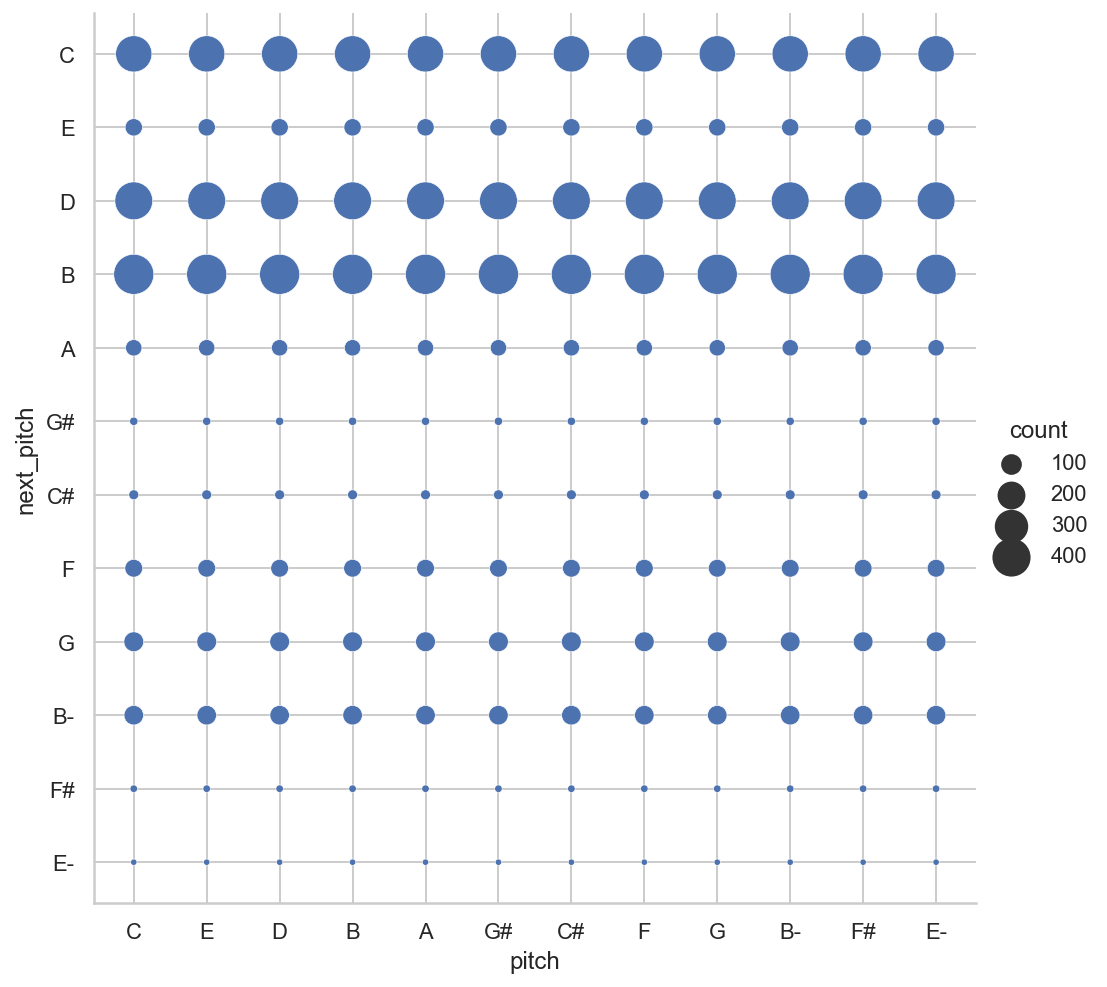

In [11]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.set_theme(style="whitegrid")
g = sns.relplot(data=pitchCounts_df, x='pitch',y='next_pitch', height=7, size='count', sizes=(10,400))
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

## Music21 Graphing and Corpus Search

In [12]:
#s = corpus.parse("BWV437")
predicate = lambda x: x.startswith('bwv4')
corpus.search(predicate, 'title')

<music21.metadata.bundles.MetadataBundle {52 entries}>

<music21.graph.plot.Histogram for <music21.stream.Score 0x1f88357b7c0>>

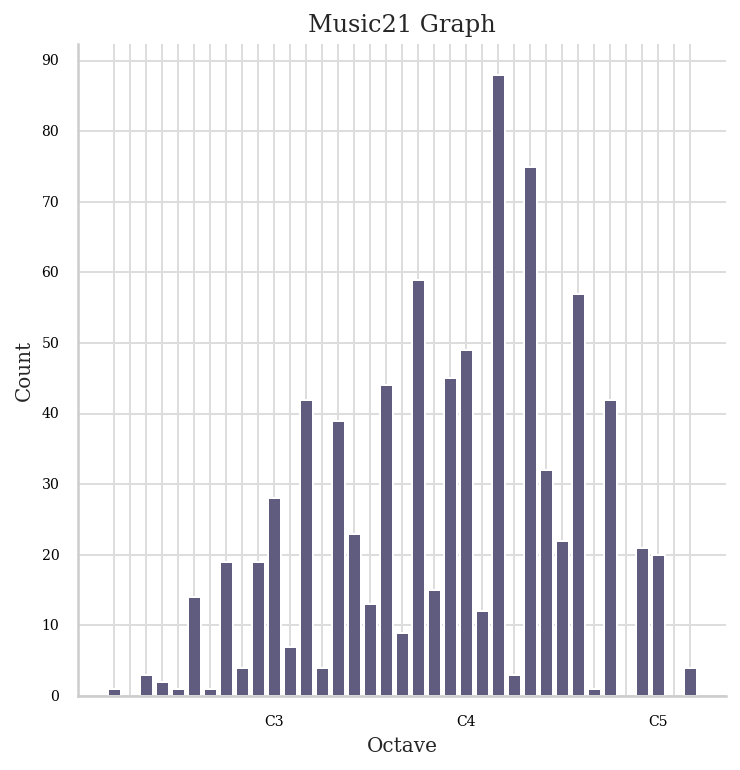

In [13]:
s = corpus.parse("BWV371")
s.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

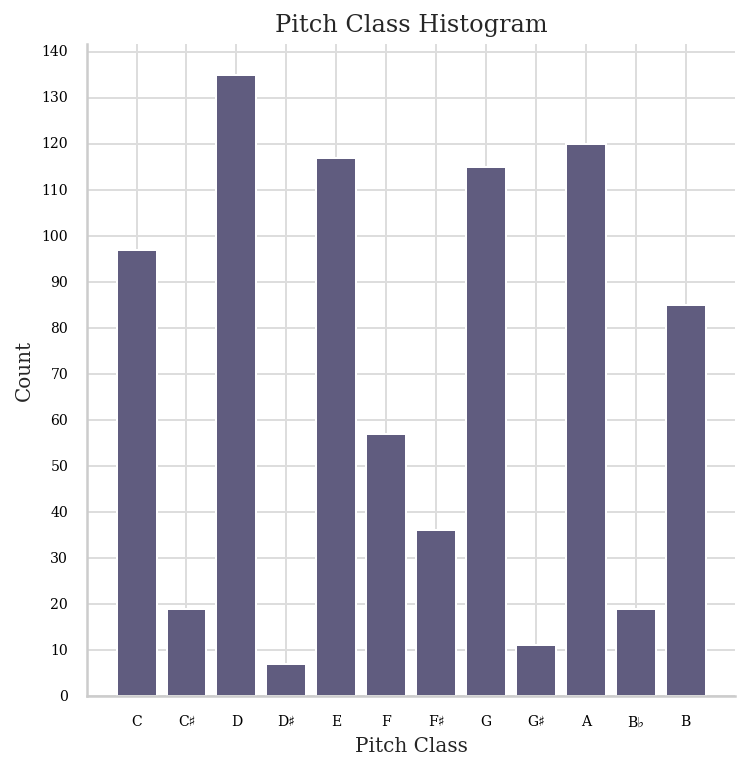

In [14]:
x = s.plot('histogram', 'pitchClass', xHideUnused=False, yAxisLabel='Number of Pitches')

<music21.graph.plot.WindowedKey for <music21.stream.Score 0x1fa939383a0>>

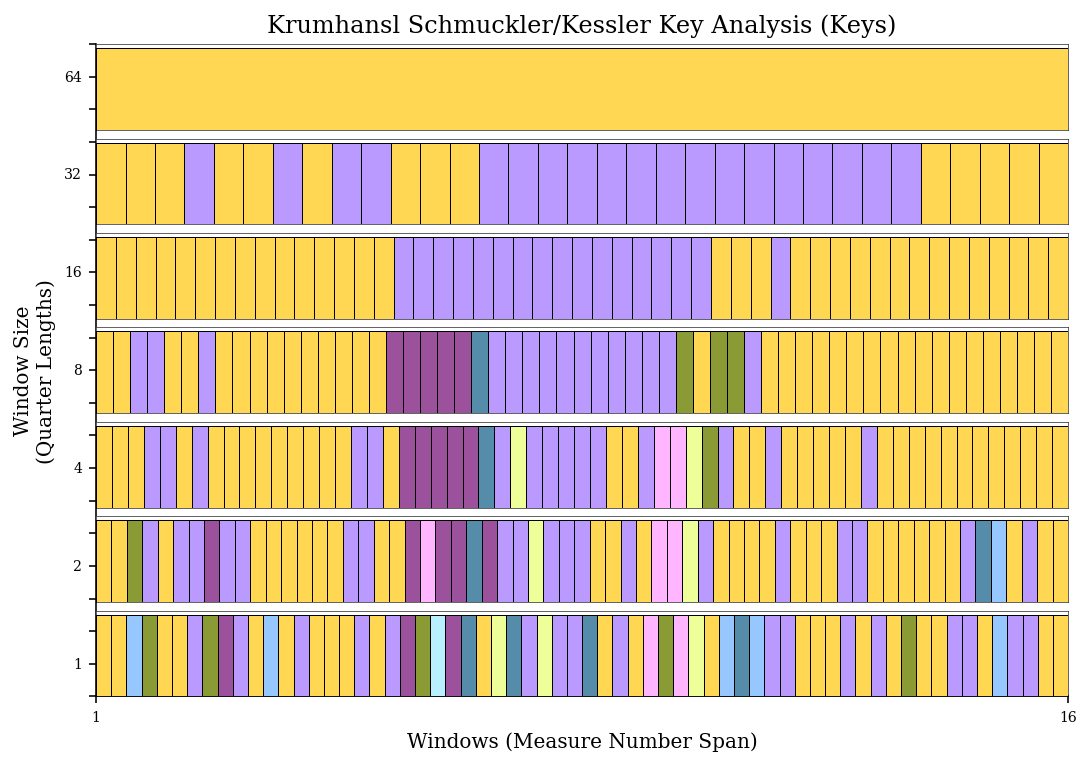

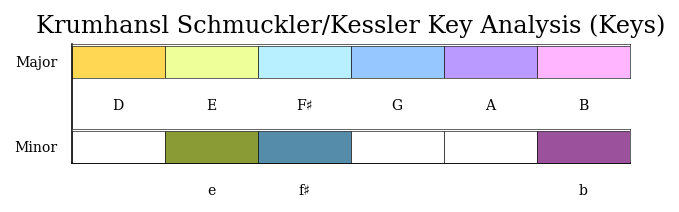

In [9]:
s.plot('colorgrid')

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x1f880a03190>>

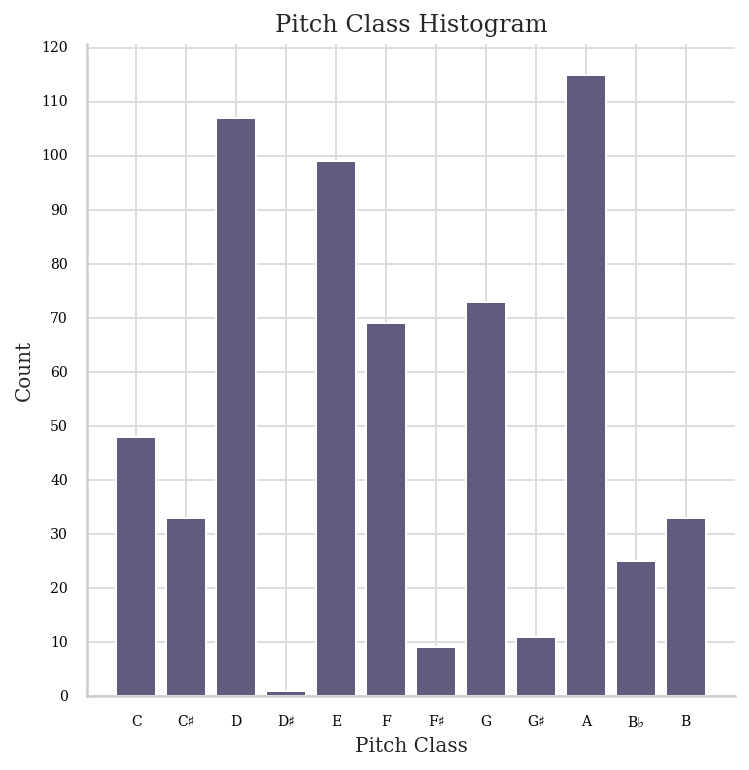

In [15]:
s1=corpus.parse("bwv371")
s2=corpus.parse("bwv437")
s1.append(s2)
s2.plot('histogram','pitchClass')

In [17]:
import seaborn as sns; sns.set_theme()
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

def pivot_data(source_df):
    cols = source_df.columns.sort_values()[:-1]
    #
    # rearrange the count data
    #
    note1 = []
    note2 = []
    count = []
    for rnum in range(len(source_df['KEY'])):
        for n2 in cols:
            note1.append(source_df.iloc[rnum]['KEY'])
            note2.append(n2)
            count.append(int(source_df.iloc[rnum][n2]))

    data = {'note1':note1, 'note2':note2, 'count':count}
    notes_df_raw = pd.DataFrame(data=data)
    notes_df = notes_df_raw.pivot('note1','note2','count')
    # return the original and pivoted data frames
    return notes_df,notes_df_raw
    
bwv371_df = pd.read_csv('resources/music/bwv371_noteCounts_dpc_01.csv')
bwv4xx_df = pd.read_csv('resources/music/bwv4xx_noteCounts_dpc_01.csv')
op18_1_1_df = pd.read_csv('resources/music/op18.1_1_noteCounts_dpc_01.csv')

nc_df,nc_raw_df = pivot_data(bwv371_df)


In [18]:
nc_df

note2,A,B,B-,C,C#,D,E,E-,F,F#,G,G#
note1,,,,,,,,,,,,
A,19,23,4,3,0,21,1,0,0,1,40,8
B,24,6,2,30,4,7,8,0,0,0,3,0
B-,12,3,0,2,0,0,0,0,0,0,2,0
C,11,35,10,11,3,26,0,1,2,0,2,0
C#,4,2,0,1,0,11,0,1,0,0,0,0
D,5,4,2,34,10,18,35,3,6,0,18,0
E,9,4,0,7,2,37,20,2,19,14,1,0
E-,0,1,0,0,1,1,3,0,0,0,1,0
F,3,0,1,2,0,2,27,0,8,2,12,0


<AxesSubplot:xlabel='note2', ylabel='note1'>

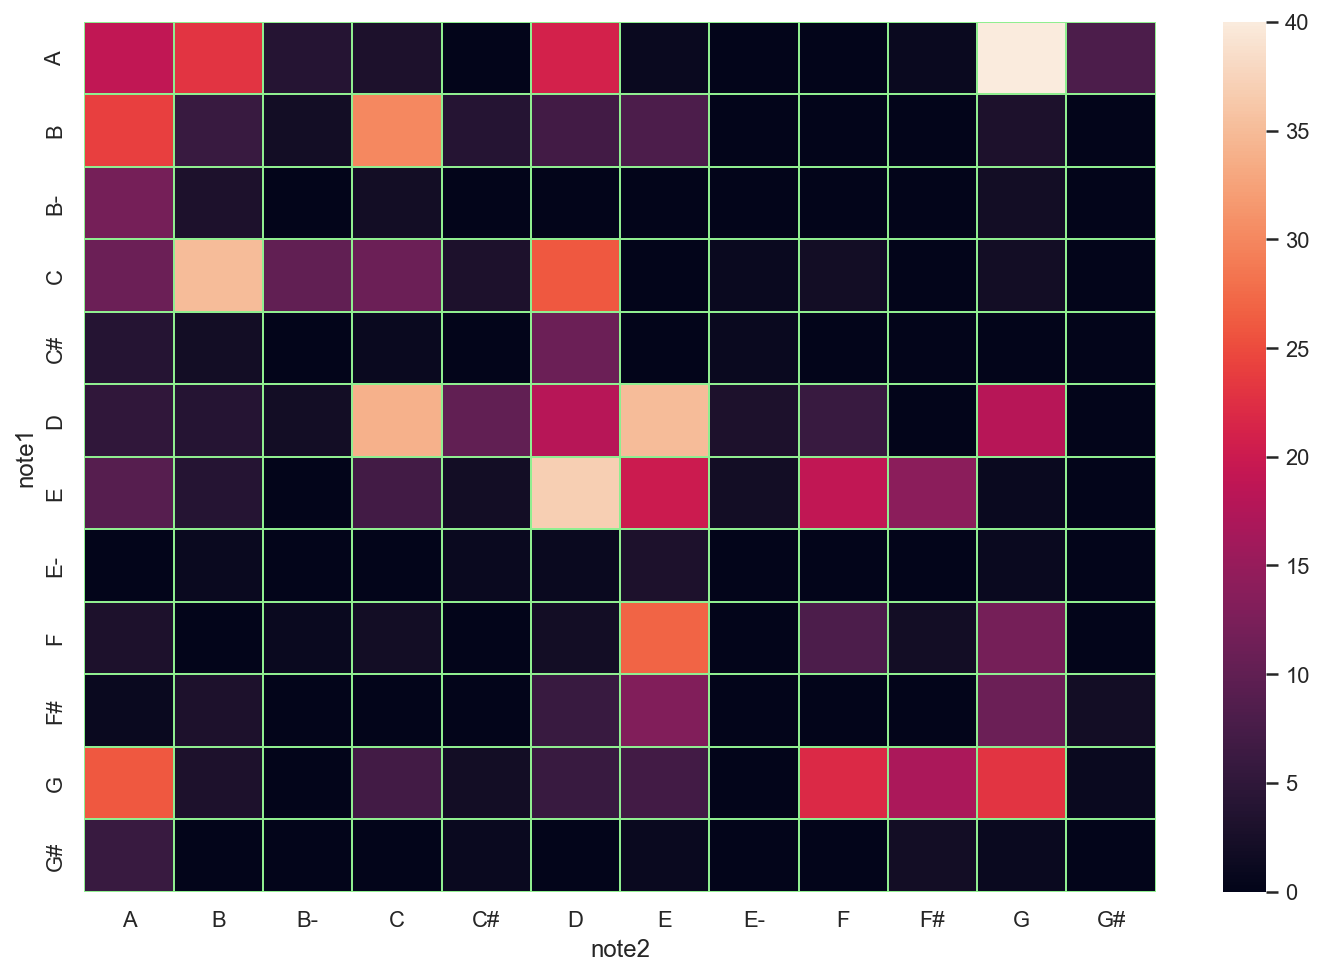

In [19]:
# Bach - BWV371
bwv371_df = pd.read_csv('resources/music/bwv371_noteCounts_dpc_01.csv')
notes_bwv371_df,bwv371_raw_df = pivot_data(bwv371_df)
plt.figure(figsize=(12,8))
sns.heatmap(notes_bwv371_df, annot=False, fmt="d", linewidths=.5, linecolor='LightGreen')

<AxesSubplot:xlabel='note2', ylabel='note1'>

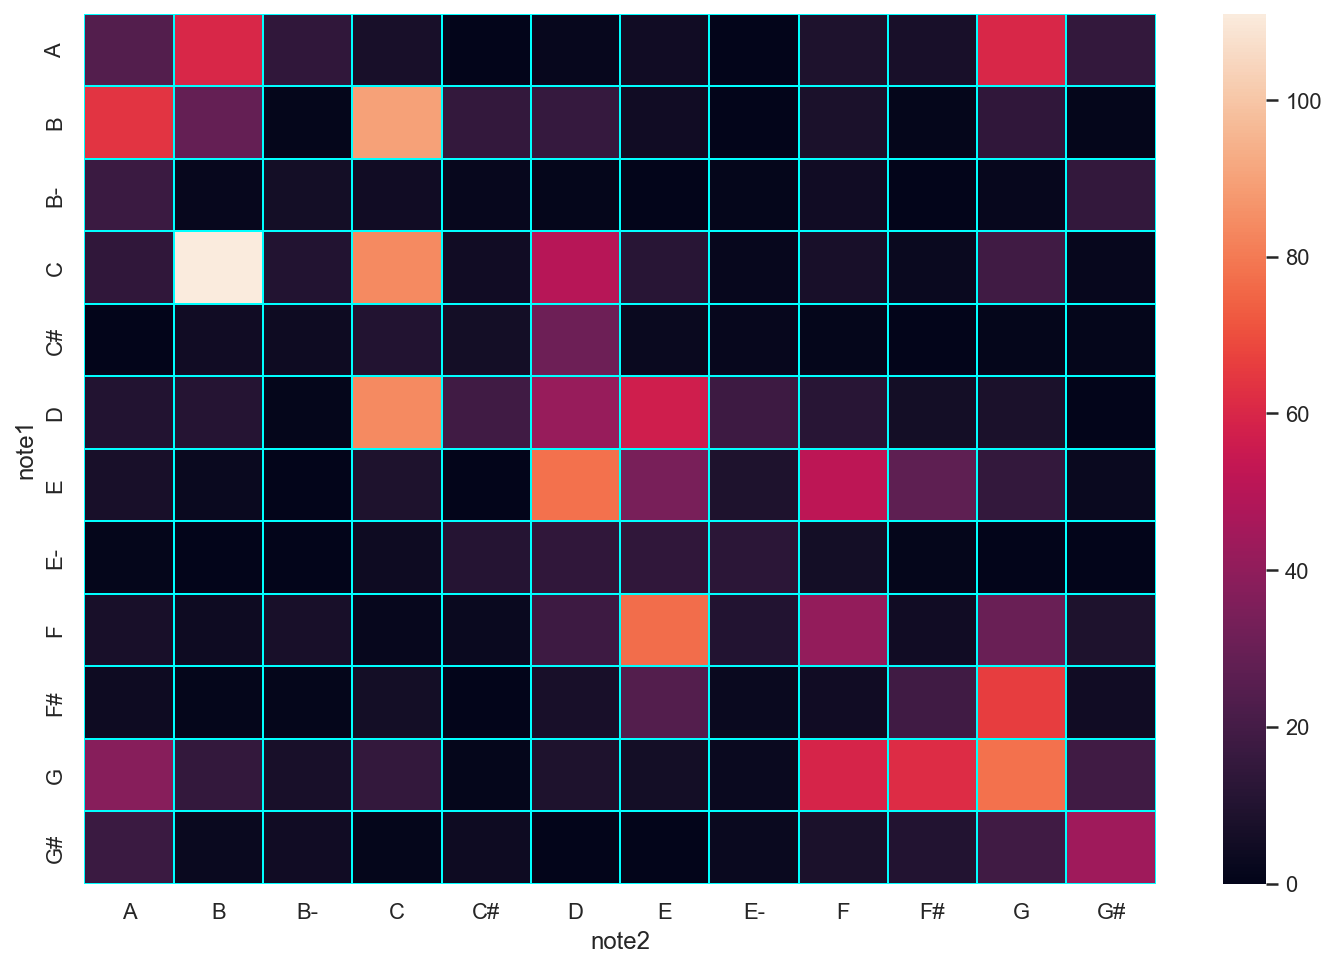

In [20]:
# Beethoven Op. 18.1 1st movement
op18_1_1_df = pd.read_csv('resources/music/op18.1_1_noteCounts_dpc_01.csv')
notes_op18_df,notes_op18_raw_df = pivot_data(op18_1_1_df)
plt.figure(figsize=(12,8))
sns.heatmap(notes_op18_df, annot=False, fmt="d", linewidths=.5, linecolor='cyan')

In [21]:
notes_bwv371_df

note2,A,B,B-,C,C#,D,E,E-,F,F#,G,G#
note1,,,,,,,,,,,,
A,19,23,4,3,0,21,1,0,0,1,40,8
B,24,6,2,30,4,7,8,0,0,0,3,0
B-,12,3,0,2,0,0,0,0,0,0,2,0
C,11,35,10,11,3,26,0,1,2,0,2,0
C#,4,2,0,1,0,11,0,1,0,0,0,0
D,5,4,2,34,10,18,35,3,6,0,18,0
E,9,4,0,7,2,37,20,2,19,14,1,0
E-,0,1,0,0,1,1,3,0,0,0,1,0
F,3,0,1,2,0,2,27,0,8,2,12,0


In [22]:
notes_op18_df

note2,A,B,B-,C,C#,D,E,E-,F,F#,G,G#
note1,,,,,,,,,,,,
A,24,60,14,7,0,2,5,0,9,7,60,15
B,64,29,1,90,15,16,5,0,8,1,14,1
B-,17,2,6,5,2,1,0,1,5,0,2,15
C,14,111,10,84,5,50,12,2,7,3,19,2
C#,0,5,4,10,6,31,3,2,1,0,1,1
D,10,11,1,84,19,42,57,18,12,6,8,0
E,7,3,0,9,0,78,34,9,52,27,15,3
E-,1,0,0,4,11,14,14,13,6,1,0,0
F,7,4,7,2,3,18,77,10,41,5,30,9
